In [2]:
# 라이브러리 불러오기
import seaborn as sns

# titanic 데이터셋 가져오기
df = sns.load_dataset('titanic')

# age 열의 첫 10개 데이터 출력 (5 행에 NaN 값)
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5     NaN
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

<Axes: >

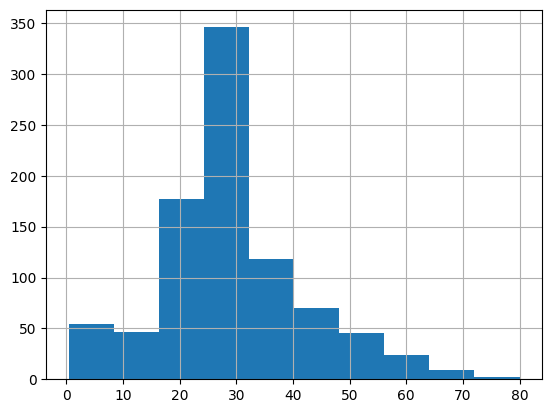

In [5]:
# 나이에 대한 hist
df['age'].hist()

In [ ]:
# age 열의 NaN값을 다른 나이 데이터의 평균으로 변경하기
median_age = df['age'].median(axis=0)   # age 열의 평균 계산 (NaN 값 제외)
df['age'] = df['age'].fillna(median_age)

# age 열의 첫 10개 데이터 출력
df['age'].head(10)

0    22.0
1    38.0
2    26.0
3    35.0
4    35.0
5    28.0
6    54.0
7     2.0
8    27.0
9    14.0
Name: age, dtype: float64

In [59]:
df = sns.load_dataset('titanic')
# 객실별 성별에 따른 평균값으로 해당 결측치를 대처
df['age'] = df.groupby(['pclass','sex'])['age'].transform('mean')

{'whiskers': [<matplotlib.lines.Line2D at 0x27c969cd1d0>,
 'caps': [<matplotlib.lines.Line2D at 0x27c969cd450>,
 'boxes': [<matplotlib.lines.Line2D at 0x27c969cd090>],
 'medians': [<matplotlib.lines.Line2D at 0x27c969cd6d0>],
 'fliers': [<matplotlib.lines.Line2D at 0x27c969cd810>],
 'means': []}

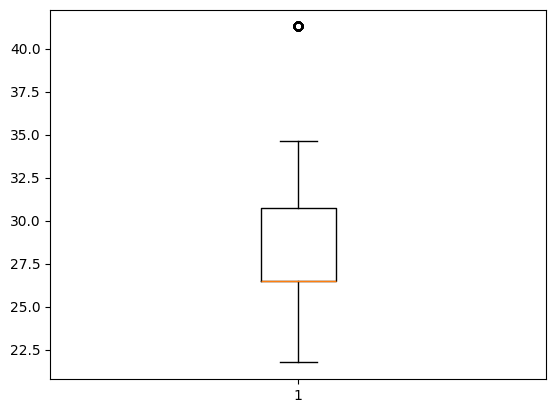

In [21]:
# 평균과 VS 중위수.... 어떤 기준으로 선택
# 평균
    # 이상치의 비중이 낮을때
# 중위수
    # 이상치의 비중이 높을때

# 결측치가 많을때..(50%이상)
# 머신러닝/딥러닝 기반의 보간 고려...

import matplotlib.pyplot as plt
plt.boxplot(df['age'])

     survived  pclass     sex        age  sibsp  parch     fare embarked  \
0           0       3    male  26.507589      1      0   7.2500        S   
1           1       1  female  34.611765      1      0  71.2833        C   
2           1       3  female  21.750000      0      0   7.9250        S   
3           1       1  female  34.611765      1      0  53.1000        S   
4           0       3    male  26.507589      0      0   8.0500        S   
..        ...     ...     ...        ...    ...    ...      ...      ...   
885         0       3  female  21.750000      0      5  29.1250        Q   
886         0       2    male  30.740707      0      0  13.0000        S   
887         1       1  female  34.611765      0      0  30.0000        S   
888         0       3  female  21.750000      1      2  23.4500        S   
890         0       3    male  26.507589      0      0   7.7500        Q   

      class    who  adult_male deck  embark_town alive  alone  
0     Third    man     

<Axes: >

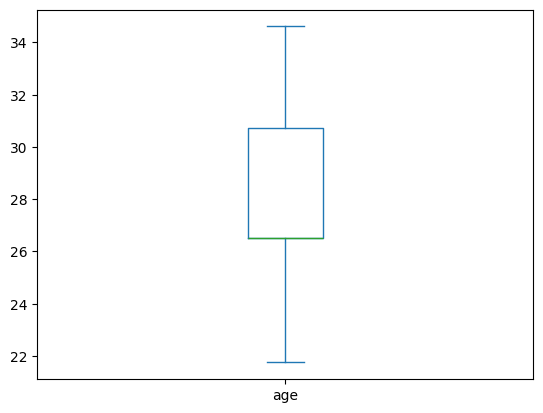

In [37]:

q1 = df['age'].quantile(0.25)
q3 = df['age'].quantile(0.75)
iqr  = q3 - q1
lower = q1 - iqr*1.5
upper = q3 + iqr*1.5
outlier_mask = (df['age'] >= lower) & (df['age'] <= upper)
print(df[outlier_mask])
df[outlier_mask]['age'].plot(kind='box')


In [45]:
# 델타 = 상대적 평균 - 중앙값의 차이
# rel_diff = abs(mean-median) / (abs(median) + 1e-8
# 평균이 중앙값에서 얼마나 떨어져 있는지를 상대적으로 본 값 값이 크면 분포가 치우져져 있거나 또는 outlier(이상치) 평균을 끌어당긴다

#쎄타 : 이상치 비율(IRQ기준)
# IQR = Q3 - Q1  이상치 = (Q1-1.5IQR ~ Q3 + 1.5IQR)
# 관측치 중 IQR 기준으로 이상치에 해당하는 값이 차지하는 비율  크면 평균이 불안정
# outlier_frac 이상치 비율   이상치개수 / 데이터 개수
# outlier_frac =  ((df['age'] < lower) | (df['age'] > upper)).sum()


# rel_diff < 델타 and outlier_frac < 세타 :
#   mean
# else
#   median

# 델타와 세타 에 해당하는 값은
# 보수적(이상치에 민감)  델타 0.05(5%)  세타 0.01(1%)
# 보통(추천)  0.08~0.10    0.02~0.03
# 관대(어느정도 편차는 허용)  0.15    0.05

In [44]:
print(1e2)
print(1e-2)

100.0
0.01


In [57]:
import seaborn as sns
titanic = sns.load_dataset('titanic')
titanic = titanic.dropna(subset=['age'])
mean =   titanic['age'].mean()
midean = titanic['age'].median()
# 상대 차이
rel_diff = abs(mean-midean) / abs(midean)+1e-8
# 이상치 비율 계산 이상치개수 / 전체개수
# q1-1.5iqr ~ q3+1.5iqr
q1 = titanic['age'].quantile(0.25)
q3 = titanic['age'].quantile(0.75)
iqr = q3 - q1
lower = q1 - 1.5*iqr
upper = q3 + 1.5*iqr
outlier_frac = ((titanic['age']<lower) | (titanic['age'] > upper)).mean()
delta ,setha = 0.08,0.02
if rel_diff < delta and outlier_frac < setha:
    print('mean')
else:
    print('median')

mean
